In [76]:
# Step 0. Import libraries and custom modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
# Preprocessing --------------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Exporting ------------------------------------------------------------
import pickle

In [2]:
# Step 1. Read the dataset
# The data this week comes from Coffee Quality Database courtesy of Buzzfeed Data Scientist 
# James LeDoux. The original data can be found on James' github. The data was re-posted to Kaggle.
# These data were collected from the Coffee Quality Institute's review pages in January 2018.
# There is data for both Arabica and Robusta beans, across many countries and professionally 
# rated on a 0-100 scale. All sorts of scoring/ratings for things like acidity, sweetness, fragrance, 
# balance, etc - may be useful for either separating into visualizations/categories or for 
# modeling/recommenders.
# https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-07/readme.md
url = 'https://raw.githubusercontent.com/rfordatascience/' + \
'tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'
df_raw = pd.read_csv(url)
df_raw.to_csv('Data/raw/coffee.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1182 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

In [3]:
# Get a sample


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
90,85.08,Arabica,steven kil,Ethiopia,aricha coop,NaN,aricha coop,NaN,the specialty coffee appraisers institute of asia,1700,...,Green,7,"October 7th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1700.0,1700.0,1700.0
968,81.25,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,jia jia coffee 佳佳咖啡莊,NaN,jia jia coffee 佳佳咖啡莊,NaN,blossom valley宸嶧國際,650 m,...,Green,0,"December 26th, 2014",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,650.0,650.0,650.0
65,85.50,Arabica,essencecoffee,Panama,elida estate,NaN,elida estate,290503,essence coffee,1680,...,NaN,2,"May 22nd, 2016",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,1680.0,1680.0,1680.0
182,84.33,Arabica,bismarck castro,Honduras,los hicaques,76,dry mill,13-111-032,cigrah s.a de c.v,1500,...,Green,2,"April 4th, 2017",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1500.0,1500.0,1500.0
612,82.67,Arabica,federacion nacional de cafeteros,Colombia,NaN,NaN,NaN,3- 01-6894,federacion nacional de cafeteros,NaN,...,Green,9,"November 2nd, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
978,81.17,Arabica,taylor winch (t) ltd,"Tanzania, United Republic Of",ampcg,NaN,taylor winch (t) ltd,C18,taylor winch (t) ltd,1550,...,Bluish-Green,2,"December 17th, 2015",Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,m,1550.0,1550.0,1550.0
1312,83.50,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,...,NaN,2,"October 31st, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3170.0,3170.0,3170.0
283,83.83,Arabica,eric thormaehlen,Costa Rica,various,NaN,coricafe sa,5-0048-0145,coricafe s.a.,1200-1400,...,Green,3,"June 9th, 2015",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1200.0,1400.0,1300.0
81,85.33,Arabica,ethiopia commodity exchange,Ethiopia,phone number | 0911-513824 email: gmt.ft,NaN,NaN,010/0157,NaN,NaN,...,NaN,2,"June 17th, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,NaN,NaN,NaN
1196,79.08,Arabica,balbino ramirez flores,Mexico,el desmoronado,NaN,el desmoronado,0,NaN,1200,...,Bluish-Green,0,"July 3rd, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1200.0,1200.0,1200.0


In [4]:
# Select metrics
df_interim = df_raw.copy()
df_interim = df_interim[['total_cup_points',
                            'species',
                            'country_of_origin',
                            'variety',
                            'aroma',
                            'aftertaste',
                            'acidity',
                            'body',
                            'balance',
                            'sweetness',
                            'altitude_mean_meters',
                            'moisture']]
df_interim = df_interim.dropna()

In [5]:
# Get a sample


,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
1095,80.25,Arabica,Honduras,Caturra,7.25,7.00,7.00,7.42,7.00,10.0,1400.0,0.10
1019,80.92,Arabica,"Tanzania, United Republic Of",Other,7.33,7.17,7.25,7.42,7.33,10.0,1700.0,0.12
723,82.33,Arabica,Colombia,Caturra,7.50,7.50,7.50,7.50,7.58,10.0,1750.0,0.00
342,83.58,Arabica,Uganda,SL14,7.67,7.42,7.75,7.75,7.67,10.0,1800.0,0.12
96,85.00,Arabica,Uganda,SL14,8.17,7.75,7.75,7.67,7.75,10.0,1800.0,0.11
652,82.58,Arabica,Brazil,Mundo Novo,7.58,7.33,7.75,7.50,7.50,10.0,975.0,0.00
18,87.25,Arabica,China,Catimor,8.42,8.08,8.17,7.92,8.00,10.0,1450.0,0.10
783,82.08,Arabica,"Tanzania, United Republic Of",Other,7.42,7.50,7.33,7.33,7.50,10.0,1600.0,0.12
714,82.33,Arabica,Guatemala,Bourbon,7.50,7.17,7.83,7.50,7.50,10.0,1676.4,0.10
960,81.33,Arabica,Mexico,Typica,7.33,7.17,7.42,7.58,7.33,10.0,1000.0,0.12


In [6]:
# Transform


In [7]:
# We'll divide our cup point into two classes: specialty or not
# All coffees with over 80 points are considered specialty, we'll use the median as separator
# https://nobletreecoffee.com/coffee-cupping/
df_interim['specialty'] = df_interim['total_cup_points'].apply(lambda x: 'Yes' if x>82.43 else 'No')

In [8]:
# Save to final dataset


In [9]:
# Proceed to train test split


In [10]:
# Sample


,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
217,Arabica,Nicaragua,Caturra,7.67,7.83,7.50,7.67,7.83,10.0,1000.0,0.12
541,Arabica,Mexico,Typica,7.83,7.25,7.58,7.50,7.50,10.0,1059.0,0.13
885,Arabica,Taiwan,Typica,7.50,7.50,7.25,7.42,7.25,10.0,150.0,0.11
121,Arabica,Kenya,SL34,7.92,7.58,7.92,7.75,7.83,10.0,1800.0,0.13
255,Arabica,Kenya,SL28,7.67,7.67,7.75,7.83,7.67,10.0,1650.0,0.00
733,Arabica,Colombia,Caturra,7.83,7.33,7.25,7.58,7.42,10.0,442.0,0.00
270,Arabica,Colombia,Caturra,7.67,7.67,7.75,7.67,7.83,10.0,1550.0,0.12
1016,Arabica,Mexico,Bourbon,7.50,7.17,7.42,7.50,7.33,10.0,1100.0,0.11
1223,Arabica,Mexico,Caturra,7.25,7.00,6.83,7.58,7.08,10.0,1200.0,0.13
1074,Arabica,Guatemala,Other,7.50,6.83,7.50,7.17,7.17,10.0,1219.2,0.11


In [11]:
# Get basic statistics


,count,mean,std,min,25%,50%,75%,max
aroma,747.0,7.565850,0.310261,5.08,7.42,7.58,7.75,8.75
aftertaste,747.0,7.386948,0.337051,6.17,7.17,7.42,7.58,8.50
acidity,747.0,7.525877,0.313565,5.25,7.33,7.50,7.67,8.58
body,747.0,7.509652,0.271466,6.42,7.33,7.50,7.67,8.42
balance,747.0,7.497617,0.341907,6.08,7.33,7.50,7.67,8.58
sweetness,747.0,9.913802,0.487428,1.33,10.00,10.00,10.00,10.00
altitude_mean_meters,747.0,1995.235849,10551.255592,1.00,1100.00,1317.00,1600.00,190164.00
moisture,747.0,0.094177,0.044333,0.00,0.10,0.11,0.12,0.17


In [12]:
# Analyze


,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
780,Arabica,Brazil,Yellow Bourbon,7.25,7.58,7.58,7.25,7.92,10.0,1.0000,0.00
613,Arabica,Brazil,Yellow Bourbon,7.58,7.42,7.67,7.50,7.50,10.0,1.0000,0.00
839,Arabica,Brazil,Yellow Bourbon,7.58,6.92,6.92,7.67,7.50,10.0,1.0000,0.00
683,Arabica,Brazil,Yellow Bourbon,7.17,7.33,7.50,7.75,7.42,10.0,1.0000,0.00
761,Arabica,Brazil,Yellow Bourbon,6.92,7.42,7.33,7.83,7.50,10.0,1.0000,0.00
963,Arabica,Brazil,Yellow Bourbon,7.17,7.17,7.08,6.92,8.17,10.0,1.0000,0.00
481,Arabica,Brazil,Yellow Bourbon,7.33,7.67,7.33,7.75,7.42,10.0,1.0000,0.00
737,Arabica,Brazil,Yellow Bourbon,7.42,7.50,7.08,7.50,7.42,10.0,1.0000,0.00
279,Arabica,Brazil,Yellow Bourbon,7.25,7.42,8.00,7.75,7.83,10.0,1.0000,0.00
877,Arabica,Brazil,Yellow Bourbon,7.25,6.92,7.42,7.50,7.58,10.0,1.0000,0.00


In [13]:
# Analyze


,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
896,Arabica,Guatemala,Bourbon,7.42,7.08,7.50,7.42,7.33,10.00,190164.0,0.12
1144,Arabica,Guatemala,Bourbon,7.50,7.25,7.58,7.33,7.42,9.33,190164.0,0.10
1040,Arabica,Nicaragua,Other,7.25,7.17,7.25,7.33,7.25,10.00,110000.0,0.12
543,Arabica,Brazil,Moka Peaberry,7.08,7.50,7.83,7.75,7.67,10.00,11000.0,0.11
840,Arabica,Myanmar,Catuai,7.33,7.50,7.42,7.33,7.33,10.00,4001.0,0.00
1123,Arabica,Myanmar,Other,7.17,7.00,7.42,7.17,7.00,10.00,3845.0,0.00
1038,Arabica,Myanmar,Catuai,6.92,7.00,7.58,7.50,7.08,10.00,3825.0,0.00
1073,Arabica,Myanmar,Other,7.17,7.17,7.42,7.25,7.08,10.00,3800.0,0.00
1269,Arabica,Indonesia,Other,7.33,6.50,6.08,7.58,6.33,9.33,3500.0,0.12
837,Arabica,Guatemala,Bourbon,7.58,7.33,7.42,7.58,7.25,10.00,3280.0,0.10


In [14]:
# Analyze


,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
940,Arabica,Brazil,Bourbon,7.25,7.42,7.17,7.33,7.33,10.00,1100.0,0.00
45,Arabica,Brazil,Bourbon,8.33,8.00,8.00,7.75,8.00,10.00,1250.0,0.11
335,Arabica,Brazil,Bourbon,7.58,7.58,7.58,7.67,7.58,10.00,890.0,0.11
716,Arabica,Brazil,Bourbon,7.75,7.67,8.08,8.08,8.00,6.67,1100.0,0.11
712,Arabica,Brazil,Bourbon,8.25,7.25,8.33,8.17,8.08,10.00,1268.0,0.07
...,...,...,...,...,...,...,...,...,...,...,...
1020,Arabica,Brazil,Yellow Bourbon,7.25,7.25,7.25,7.25,7.33,10.00,1200.0,0.12
481,Arabica,Brazil,Yellow Bourbon,7.33,7.67,7.33,7.75,7.42,10.00,1.0,0.00
683,Arabica,Brazil,Yellow Bourbon,7.17,7.33,7.50,7.75,7.42,10.00,1.0,0.00
761,Arabica,Brazil,Yellow Bourbon,6.92,7.42,7.33,7.83,7.50,10.00,1.0,0.00


In [15]:
# Count values


Arabica    745
Robusta      2
Name: species, dtype: int64

In [16]:
# Count countries


Mexico                          173
Guatemala                       101
Colombia                         99
Brazil                           77
Taiwan                           49
Honduras                         39
Costa Rica                       32
Tanzania, United Republic Of     24
Uganda                           19
Kenya                            18
China                            14
El Salvador                      14
Indonesia                        13
Nicaragua                        13
Ethiopia                         11
Malawi                            9
Myanmar                           7
Thailand                          4
Haiti                             4
United States                     4
Vietnam                           4
Laos                              3
Panama                            3
United States (Puerto Rico)       3
Peru                              2
Philippines                       2
India                             2
Burundi                     

In [17]:
# Get %


Mexico                          0.231593
Guatemala                       0.135207
Colombia                        0.132530
Brazil                          0.103079
Taiwan                          0.065596
Honduras                        0.052209
Costa Rica                      0.042838
Tanzania, United Republic Of    0.032129
Uganda                          0.025435
Kenya                           0.024096
China                           0.018742
El Salvador                     0.018742
Indonesia                       0.017403
Nicaragua                       0.017403
Ethiopia                        0.014726
Malawi                          0.012048
Myanmar                         0.009371
Thailand                        0.005355
Haiti                           0.005355
United States                   0.005355
Vietnam                         0.005355
Laos                            0.004016
Panama                          0.004016
United States (Puerto Rico)     0.004016
Peru            

In [18]:
# Count variety


Caturra                  180
Typica                   152
Bourbon                  149
Other                     81
Catuai                    53
Yellow Bourbon            23
Mundo Novo                20
Catimor                   17
SL14                      12
Pacas                     10
Gesha                     10
SL28                      10
SL34                       8
Pacamara                   7
Java                       2
Mandheling                 2
Sumatra                    2
Ruiru 11                   1
Sulawesi                   1
Ethiopian Heirlooms        1
Peaberry                   1
Ethiopian Yirgacheffe      1
Blue Mountain              1
Moka Peaberry              1
Marigojipe                 1
Sumatra Lintong            1
Pache Comun                0
Arusha                     0
Name: variety, dtype: int64

In [19]:
# Get % variety


Caturra                  0.240964
Typica                   0.203481
Bourbon                  0.199465
Other                    0.108434
Catuai                   0.070950
Yellow Bourbon           0.030790
Mundo Novo               0.026774
Catimor                  0.022758
SL14                     0.016064
Pacas                    0.013387
Gesha                    0.013387
SL28                     0.013387
SL34                     0.010710
Pacamara                 0.009371
Java                     0.002677
Mandheling               0.002677
Sumatra                  0.002677
Ruiru 11                 0.001339
Sulawesi                 0.001339
Ethiopian Heirlooms      0.001339
Peaberry                 0.001339
Ethiopian Yirgacheffe    0.001339
Blue Mountain            0.001339
Moka Peaberry            0.001339
Marigojipe               0.001339
Sumatra Lintong          0.001339
Pache Comun              0.000000
Arusha                   0.000000
Name: variety, dtype: float64

In [20]:
# Given the excess of categories in country and variety, we'll aggregate 
# low values into others (using Pareto's rule or a minimum of 50 observations)


In [21]:
# Second interation after cleaning up variables


In [22]:
# Again, train and test


In [23]:
# Get info


<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 780 to 911
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country_of_origin  747 non-null    category
 1   variety            747 non-null    category
 2   aroma              747 non-null    float64 
 3   aftertaste         747 non-null    float64 
 4   acidity            747 non-null    float64 
 5   body               747 non-null    float64 
 6   balance            747 non-null    float64 
 7   moisture           747 non-null    float64 
dtypes: category(2), float64(6)
memory usage: 42.7 KB


In [24]:
# Get stats


,aroma,aftertaste,acidity,body,balance,moisture
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,7.565850,7.386948,7.525877,7.509652,7.497617,0.094177
std,0.310261,0.337051,0.313565,0.271466,0.341907,0.044333
min,5.080000,6.170000,5.250000,6.420000,6.080000,0.000000
25%,7.420000,7.170000,7.330000,7.330000,7.330000,0.100000
50%,7.580000,7.420000,7.500000,7.500000,7.500000,0.110000
75%,7.750000,7.580000,7.670000,7.670000,7.670000,0.120000
max,8.750000,8.500000,8.580000,8.420000,8.580000,0.170000


In [25]:
# Describe categories


,country_of_origin,variety
count,747,747
unique,6,5
top,Other,Other
freq,248,213


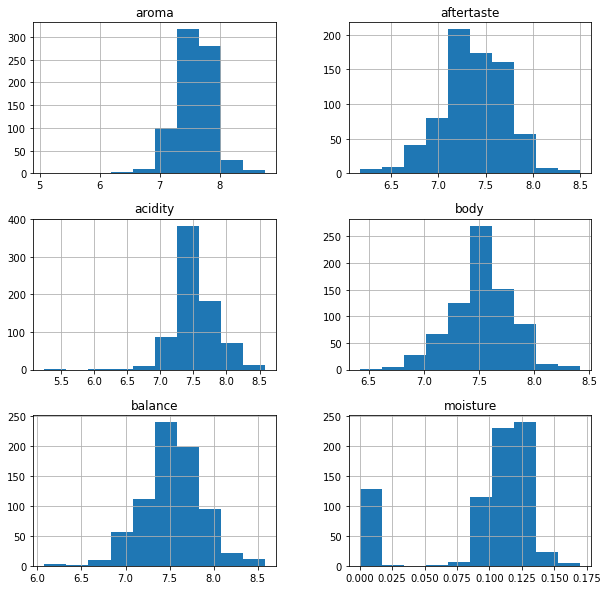

In [26]:
# Plot histograms


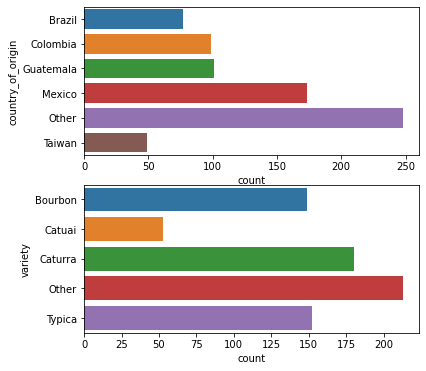

In [27]:
# Plot categories countplot


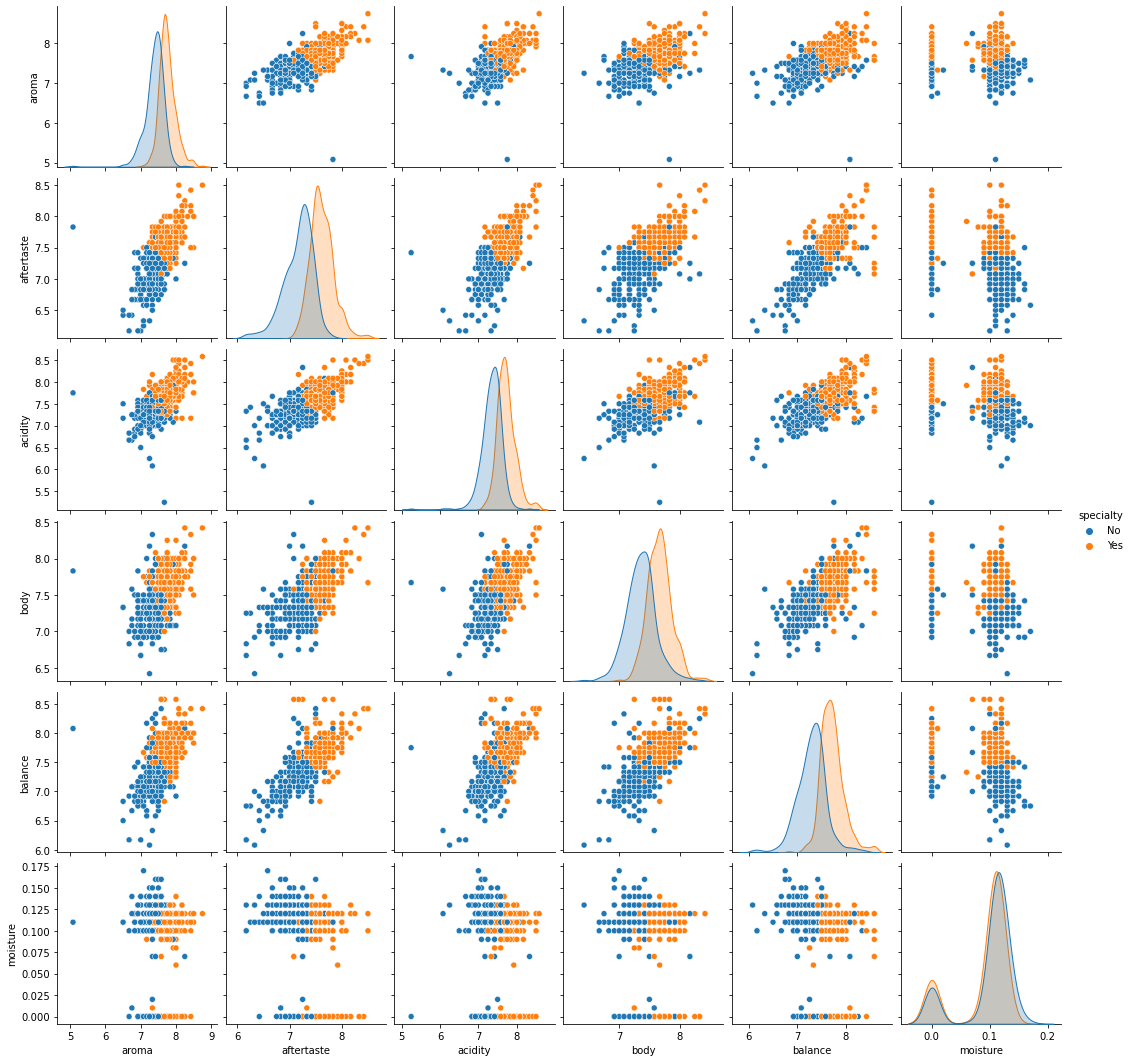

In [28]:
# Plot pairplot


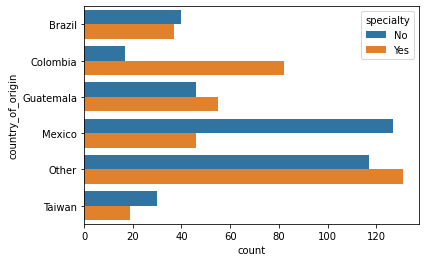

In [29]:
# Plot category effect


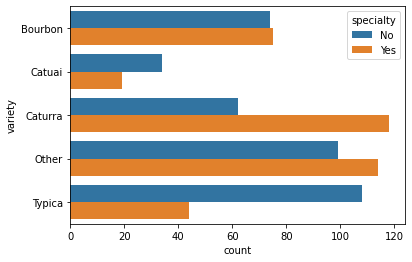

In [71]:
# Plot category effect


In [30]:
# Calculate correlation


,aroma,aftertaste,acidity,body,balance,moisture
aroma,1.000000,0.675971,0.586244,0.523622,0.588692,-0.038481
aftertaste,0.675971,1.000000,0.680573,0.668489,0.768697,-0.139767
acidity,0.586244,0.680573,1.000000,0.604851,0.638995,-0.084052
body,0.523622,0.668489,0.604851,1.000000,0.688455,-0.178684
balance,0.588692,0.768697,0.638995,0.688455,1.000000,-0.197440
moisture,-0.038481,-0.139767,-0.084052,-0.178684,-0.197440,1.000000


In [31]:
# 3.1 Create your pipeline processing
# https://stackoverflow.com/questions/61641852/
# https://jaketae.github.io/study/sklearn-pipeline/
cat_cols = X_train.select_dtypes(include='category').columns
num_cols = X_train.select_dtypes(include='number').columns

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])

num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

encode_data = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [46]:
# 3.2 Perform model fit


R2 score:  1.000


              precision    recall  f1-score   support

          No       0.95      0.91      0.93       126
         Yes       0.91      0.95      0.93       124

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



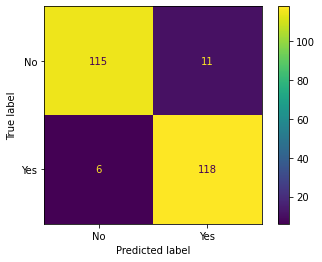

In [47]:
# 3.4 Calculate metrics on model


In [65]:
# Get variable importance


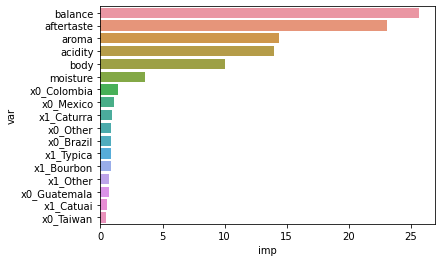

In [75]:
# Plot variable importance


In [77]:
# Save the model as a pickle
filename = 'coffee_model.pkl'
pickle.dump(rforest, open(filename,'wb'))

In [113]:
# Create a set for testing


In [114]:
# Predcit based on the set


array(['No'], dtype=object)